In [1]:
import os

os.chdir('..')

In [2]:
# detecção de anomalias

In [3]:
from datasetsforecast.m3 import M3
from statsforecast import StatsForecast

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsforecast/core.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [4]:
dataset, *_ = M3.load('./assets', 'Monthly')
dataset



/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/datasetsforecast/m3.py:108: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(class_group.freq)


,unique_id,ds,y
0,M1,1990-01-31,2640.0
1,M1,1990-02-28,2640.0
2,M1,1990-03-31,2160.0
3,M1,1990-04-30,4200.0
4,M1,1990-05-31,3360.0
...,...,...,...
167557,M999,1993-10-31,5225.9
167558,M999,1993-11-30,5236.3
167559,M999,1993-12-31,5186.6
167560,M999,1994-01-31,5143.4


In [5]:
dataset

,unique_id,ds,y
0,M1,1990-01-31,2640.0
1,M1,1990-02-28,2640.0
2,M1,1990-03-31,2160.0
3,M1,1990-04-30,4200.0
4,M1,1990-05-31,3360.0
...,...,...,...
167557,M999,1993-10-31,5225.9
167558,M999,1993-11-30,5236.3
167559,M999,1993-12-31,5186.6
167560,M999,1994-01-31,5143.4


In [5]:
amostra_ids = dataset['unique_id'].unique()[:10]
amostra = dataset.query('unique_id in @amostra_ids')
amostra

,unique_id,ds,y
0,M1,1990-01-31,2640.00
1,M1,1990-02-28,2640.00
2,M1,1990-03-31,2160.00
3,M1,1990-04-30,4200.00
4,M1,1990-05-31,3360.00
...,...,...,...
1138,M1006,1993-10-31,6282.20
1139,M1006,1993-11-30,6271.75
1140,M1006,1993-12-31,6260.30
1141,M1006,1994-01-31,6279.10


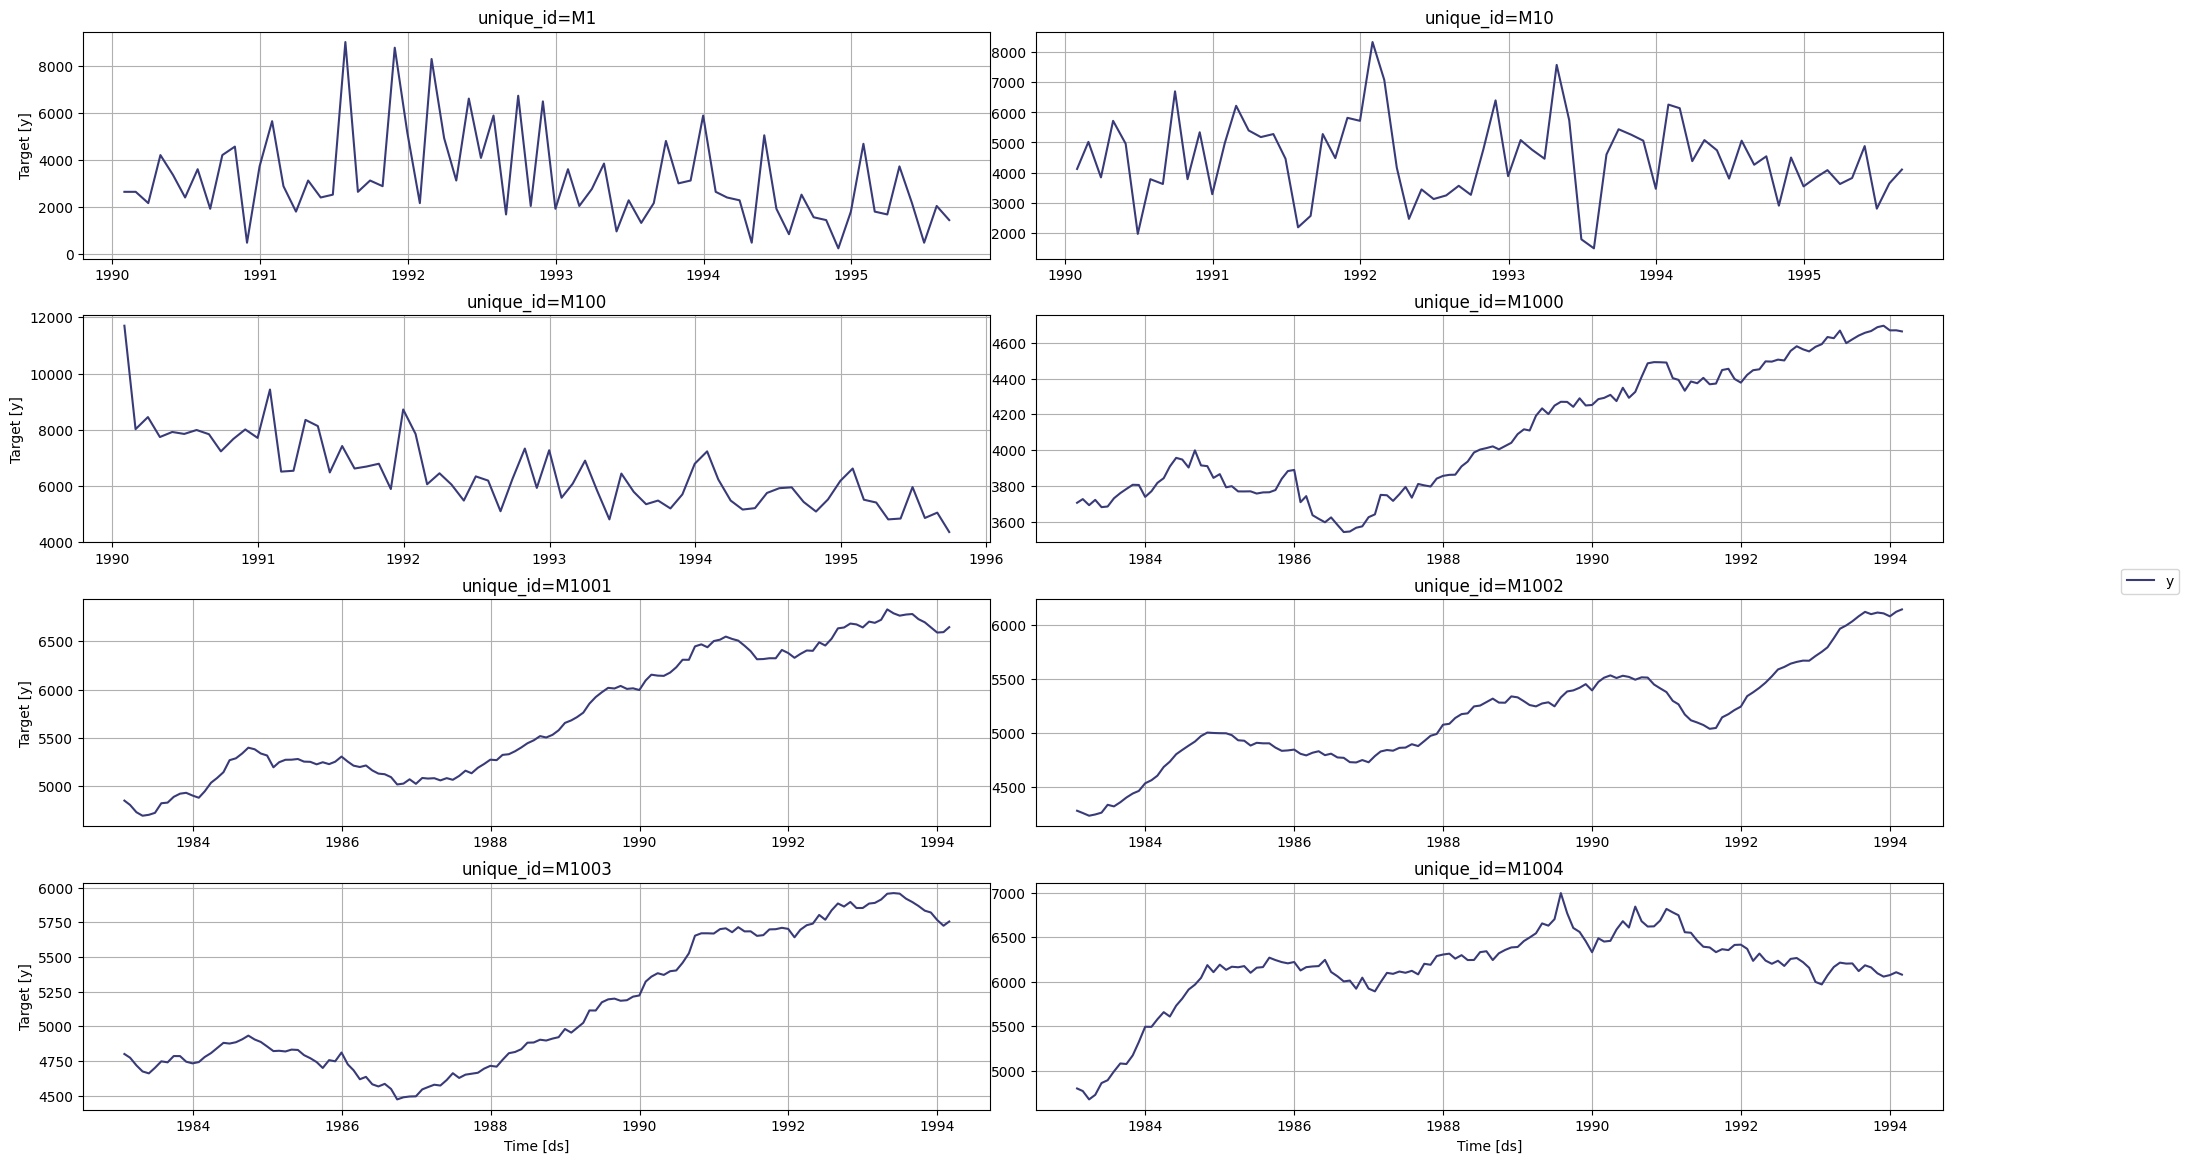

In [6]:
StatsForecast.plot(amostra, plot_random = False)

In [7]:
from statsforecast.models import AutoARIMA, AutoETS

models = [AutoARIMA(season_length=12),
          AutoETS()]

In [8]:
sf = StatsForecast(
    df = amostra, 
    models = models, 
    freq = 'M', 
    n_jobs = 1
)

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [9]:
previsoes = sf.forecast(h = 12, level = [99], fitted = True)

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/utilsforecast/processing.py:382: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/utilsforecast/processing.py:436: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In 

In [10]:
previsoes = previsoes.reset_index()
previsoes.head()

,unique_id,ds,AutoARIMA,AutoARIMA-lo-99,AutoARIMA-hi-99,AutoETS,AutoETS-lo-99,AutoETS-hi-99
0,M1,1995-09-30,2056.238525,-2598.433594,6710.910645,1678.119263,-634.699707,3990.938232
1,M1,1995-10-31,1753.074341,-2956.490234,6462.639160,1635.192871,-618.716980,3889.102783
2,M1,1995-11-30,1753.074341,-3068.230957,6574.379883,1595.990234,-604.807068,3796.787598
3,M1,1995-12-31,1753.074341,-3177.439697,6683.588379,1560.188232,-593.164795,3713.541260
4,M1,1996-01-31,1753.074341,-3284.281494,6790.430176,1527.491943,-583.911255,3638.895264


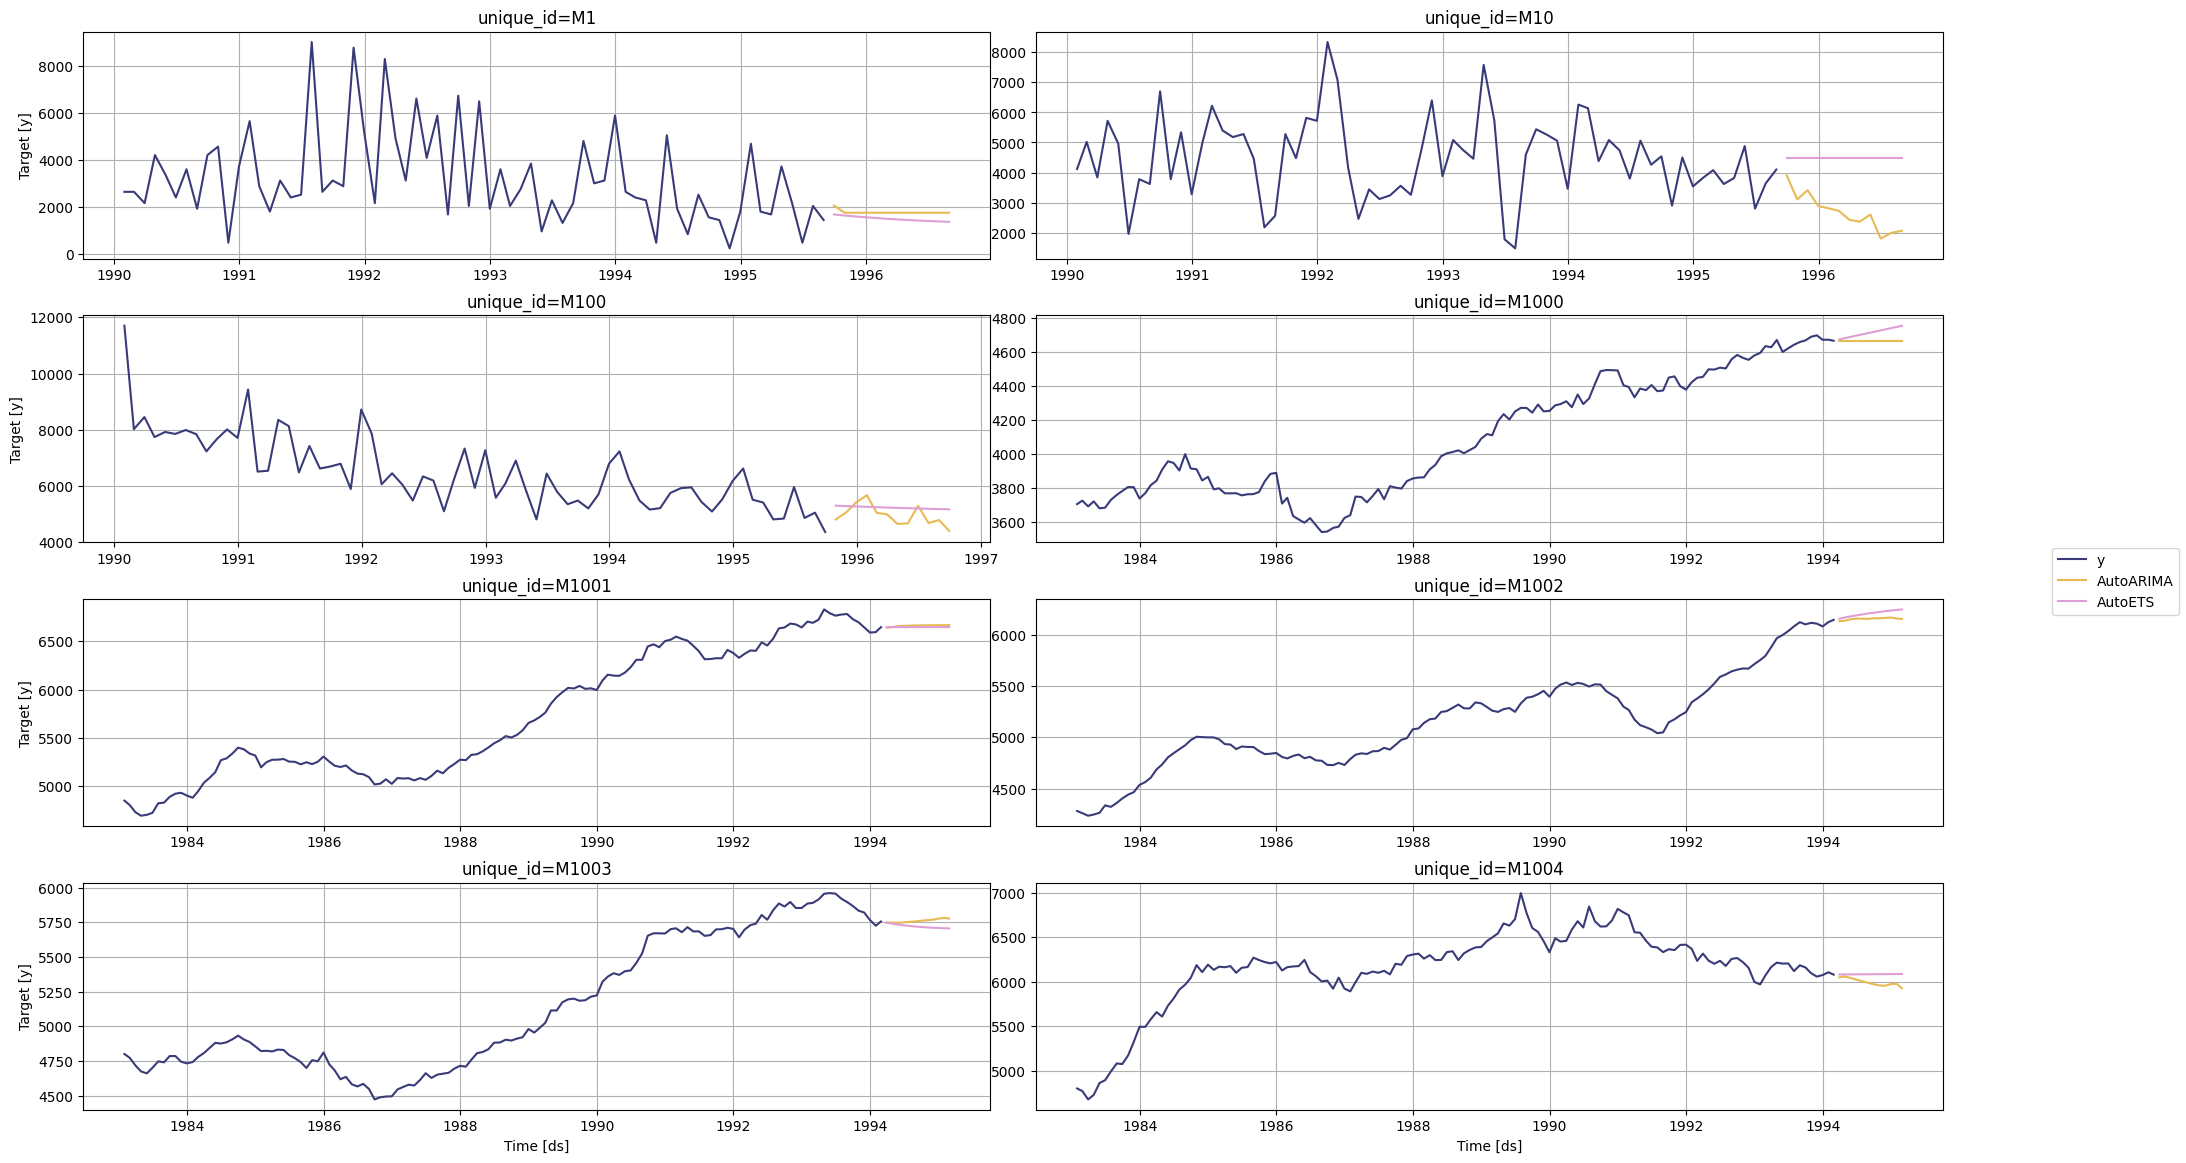

In [11]:
StatsForecast.plot(amostra, previsoes, plot_random = False)

In [12]:
previsoes_treino = sf.forecast_fitted_values().reset_index()
previsoes_treino.head()

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,unique_id,ds,y,AutoARIMA,AutoARIMA-lo-99,AutoARIMA-hi-99,AutoETS,AutoETS-lo-99,AutoETS-hi-99
0,M1,1990-01-31,2640.0,2637.360107,-2017.312134,7292.032227,1832.713989,-3178.750244,6844.178223
1,M1,1990-02-28,2640.0,2639.996826,-2014.675415,7294.668945,2112.226074,-2899.238281,7123.690430
2,M1,1990-03-31,2160.0,2519.275635,-2135.396729,7173.947754,2374.031250,-2637.432861,7385.495605
3,M1,1990-04-30,4200.0,2745.218262,-1909.453857,7399.890625,2610.205078,-2401.259277,7621.669434
4,M1,1990-05-31,3360.0,2502.249512,-2152.422852,7156.921875,2846.422607,-2165.041748,7857.886719


In [14]:
anomalias = previsoes_treino.loc[(previsoes_treino['y'] >= previsoes_treino['AutoARIMA-hi-99']) | (previsoes_treino['y'] <= previsoes_treino['AutoARIMA-lo-99'])]
anomalias.head()

,unique_id,ds,y,AutoARIMA,AutoARIMA-lo-99,AutoARIMA-hi-99,AutoETS,AutoETS-lo-99,AutoETS-hi-99
18,M1,1991-07-31,9000.000000,2966.403076,-1688.269165,7621.075195,4182.979980,-828.484375,9194.444336
107,M10,1993-04-30,7580.000000,3566.413574,-322.048065,7454.875488,4473.525879,976.751648,7970.300293
137,M100,1990-02-28,8020.000000,9956.074219,8246.959961,11665.188477,8803.427734,6704.781250,10902.073242
241,M1000,1986-01-31,3708.800049,3889.000000,3780.071533,3997.928467,3896.024170,3787.548340,4004.499756
254,M1000,1987-02-28,3749.600098,3640.600098,3531.671387,3749.528564,3646.725830,3538.250244,3755.201660


<Axes: >

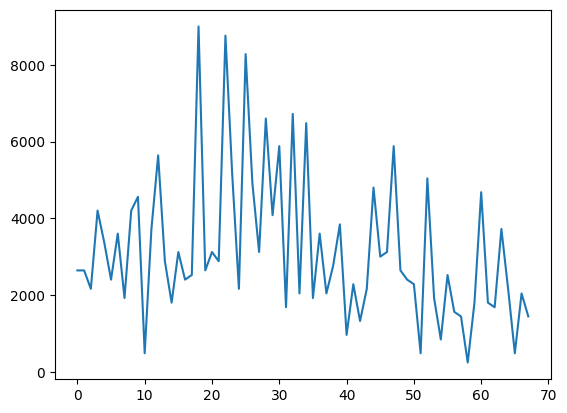

In [18]:
previsoes_treino.query('unique_id=="M1"')['y'].plot()